<a href="https://colab.research.google.com/github/mar2nyuedu/colab/blob/main/Mohammed_Rahman_Project_Multi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This is a Network Intrusion Detection problem. Given a set of network connection records, we need to classify these records as network attacks or regular traffic.
## NSL-KDD (Network Security Lab-KDD) is a dataset for network intrusion detection research. The NSL-KDD dataset contains network traffic data generated by different types of attacks on a simulated network environment.
## The dataset is divided into two sets: the training set and the testing set. The dataset contains 43 features for each connection record, such as protocol type, service, flag, and various other statistics. Additionally, it includes a label for each record indicating whether it represents normal traffic or one of the 22 different attack types.
## There are 125973 records in the training dataset and 22544 records in the test dataset. There are 23 types of attack in the training dataset but 38 types of attack in the test dataset.
# Researchers and developers use the NSL-KDD dataset to train and evaluate intrusion detection models, enabling them to identify and classify network traffic patterns and develop algorithms that can detect and prevent cyber-attacks.

Load and Configure Python Libraries

In [82]:
# Step 1: import the required modules
import pandas as pd
import numpy as np
import warnings
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 

from keras.models import Sequential
from keras.optimizers import Adam, Nadam
from keras.layers import Dense, Dropout

from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils


# Ignore all warnings
warnings.simplefilter(action='ignore', category=Warning)

# set pandas columns
pd.set_option('display.max_columns', 50)



Mount Drive

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load Training and Test Data

In [84]:
#Read the data from the CSV file

df_train = pd.read_csv('/content/drive/MyDrive/Project/KDDTrainLabeled.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Project/KDDTestLabeled.csv')

Let's view some of the training and test data

In [85]:
df_train.head(5)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [86]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [87]:
df_test.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [88]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

Let's check if there is any missing data in both training and test dataset

In [89]:
df_train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [90]:
df_test.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

Wow! Both the training and test data is free from any null values

Let's Visualize the data

In [91]:
def visualize(df_train_data,df_test_data):
  fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(25, 7.5), dpi=100)

  fig.suptitle(f'Counts of Observation Labels', fontsize=25)

  sns.countplot(x="attack", 
              palette="OrRd_r", 
              data=df_train_data, 
              order=df_train_data['attack'].value_counts().index,
              ax=ax1)

  ax1.set_title('Train Set', fontsize=20)
  ax1.set_xlabel('label', fontsize=15)
  ax1.set_ylabel('count', fontsize=15)
  ax1.tick_params(labelrotation=90)

  sns.countplot(x="attack", 
              palette="GnBu_r", 
              data=df_test_data, 
              order=df_test_data['attack'].value_counts().index,
              ax=ax2)

  ax2.set_title('Test Set', fontsize=20)
  ax2.set_xlabel('label', fontsize=15)
  ax2.set_ylabel('count', fontsize=15)
  ax2.tick_params(labelrotation=90)

  plt.show()

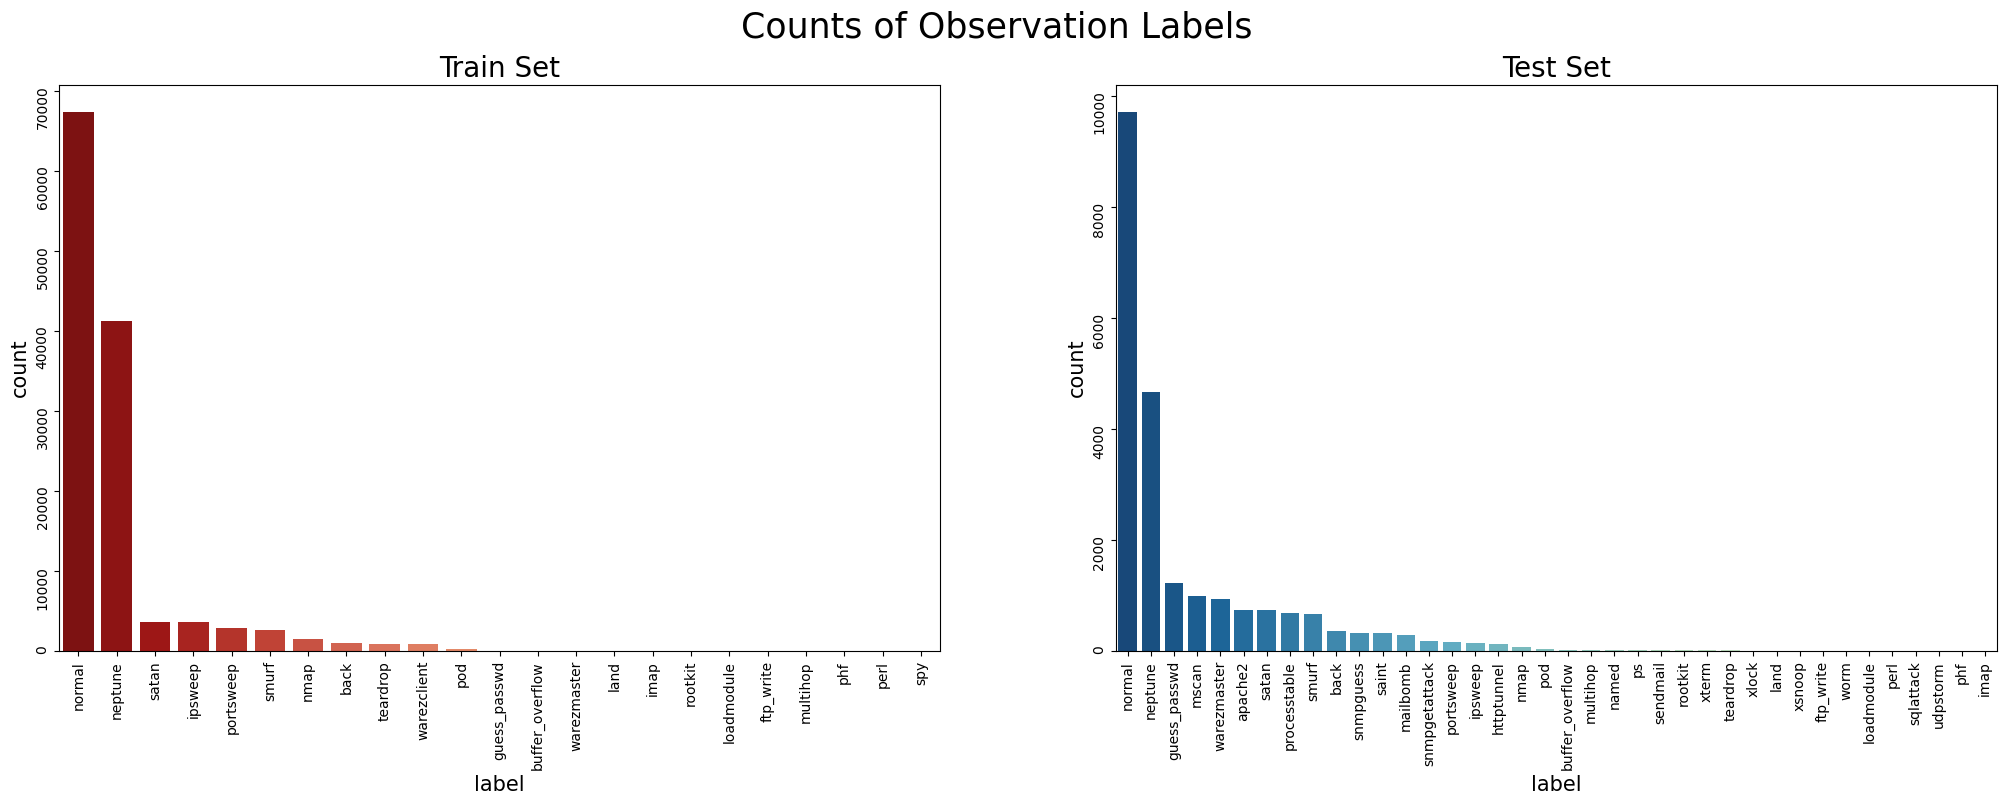

In [92]:
visualize(df_train,df_test)

Uh-oh! The data is imbalanced in a major way. Most of the connections are either 'normal' or 'neptune' attack both in training and test dataset. That's a problem training the model for other categories of attack. The second problem is there are categories in the testset (like saint, mailbomb) that do not exist in the training set. Also, there is merely any guess_passwd attack on the training set but a lot in the test set. How can we train our model without any or very low examples? We have to do something to resolve these issues.


In [93]:
print("Traning Data breakdown: ")
print("total number of rows: "  + str(df_train["attack"].count()))
print("normal rows         : " + str((df_train['attack'] == 'normal').sum()))
print("neptune rows        : " + str((df_train['attack'] == 'neptune').sum()))
print("other rows          : " + str(((df_train['attack'] != 'normal') & (df_train['attack'] != 'neptune')).sum()))
print()
print("Test Data breakdown: ")
print("total number of rows: "  + str(df_test["attack"].count()))
print("normal rows         : " + str((df_test['attack'] == 'normal').sum()))
print("neptune rows        : " + str((df_test['attack'] == 'neptune').sum()))
print("other rows          : " + str(((df_test['attack'] != 'normal') & (df_test['attack'] != 'neptune')).sum()))


Traning Data breakdown: 
total number of rows: 125973
normal rows         : 67343
neptune rows        : 41214
other rows          : 17416

Test Data breakdown: 
total number of rows: 22544
normal rows         : 9711
neptune rows        : 4657
other rows          : 8176


There is just too much of 'normal' and 'neptune' attack data in both sets. Let's bring down 'normal; and 'neptune' data down to 4,000 records in the training set and 2000 reconds on the test set and visualize the data again.

In [94]:
random_state = 42
train_sample_size=4000
test_sample_size=2000
 
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

df_train_normal= df_train_copy[df_train_copy['attack']=='normal'].copy()
df_train_neptune= df_train_copy[df_train_copy['attack']=='neptune'].copy()

df_test_normal= df_test_copy[df_test_copy['attack']=='normal'].copy()
df_test_neptune= df_test_copy[df_test_copy['attack']=='neptune'].copy()

df_train_normal_sample= df_train_normal.sample(n=train_sample_size, random_state=random_state)
df_train_neptune_sample= df_train_neptune.sample(n=train_sample_size, random_state=random_state)

df_test_normal_sample= df_test_normal.sample(n=test_sample_size, random_state=random_state)
df_test_neptune_sample= df_test_neptune.sample(n=test_sample_size, random_state=random_state)

df_train_copy.drop(df_train_copy.loc[df_train_copy['attack']=='normal'].index, inplace=True)
df_train_copy.drop(df_train_copy.loc[df_train_copy['attack']=='neptune'].index, inplace=True)

df_test_copy.drop(df_test_copy.loc[df_test_copy['attack']=='normal'].index, inplace=True)
df_test_copy.drop(df_test_copy.loc[df_test_copy['attack']=='neptune'].index, inplace=True)

df_train_copy = pd.concat([df_train_copy, df_train_normal_sample, df_train_neptune_sample], axis=0)
df_test_copy = pd.concat([df_test_copy, df_test_normal_sample, df_test_neptune_sample], axis=0)

Let's Visualize Again

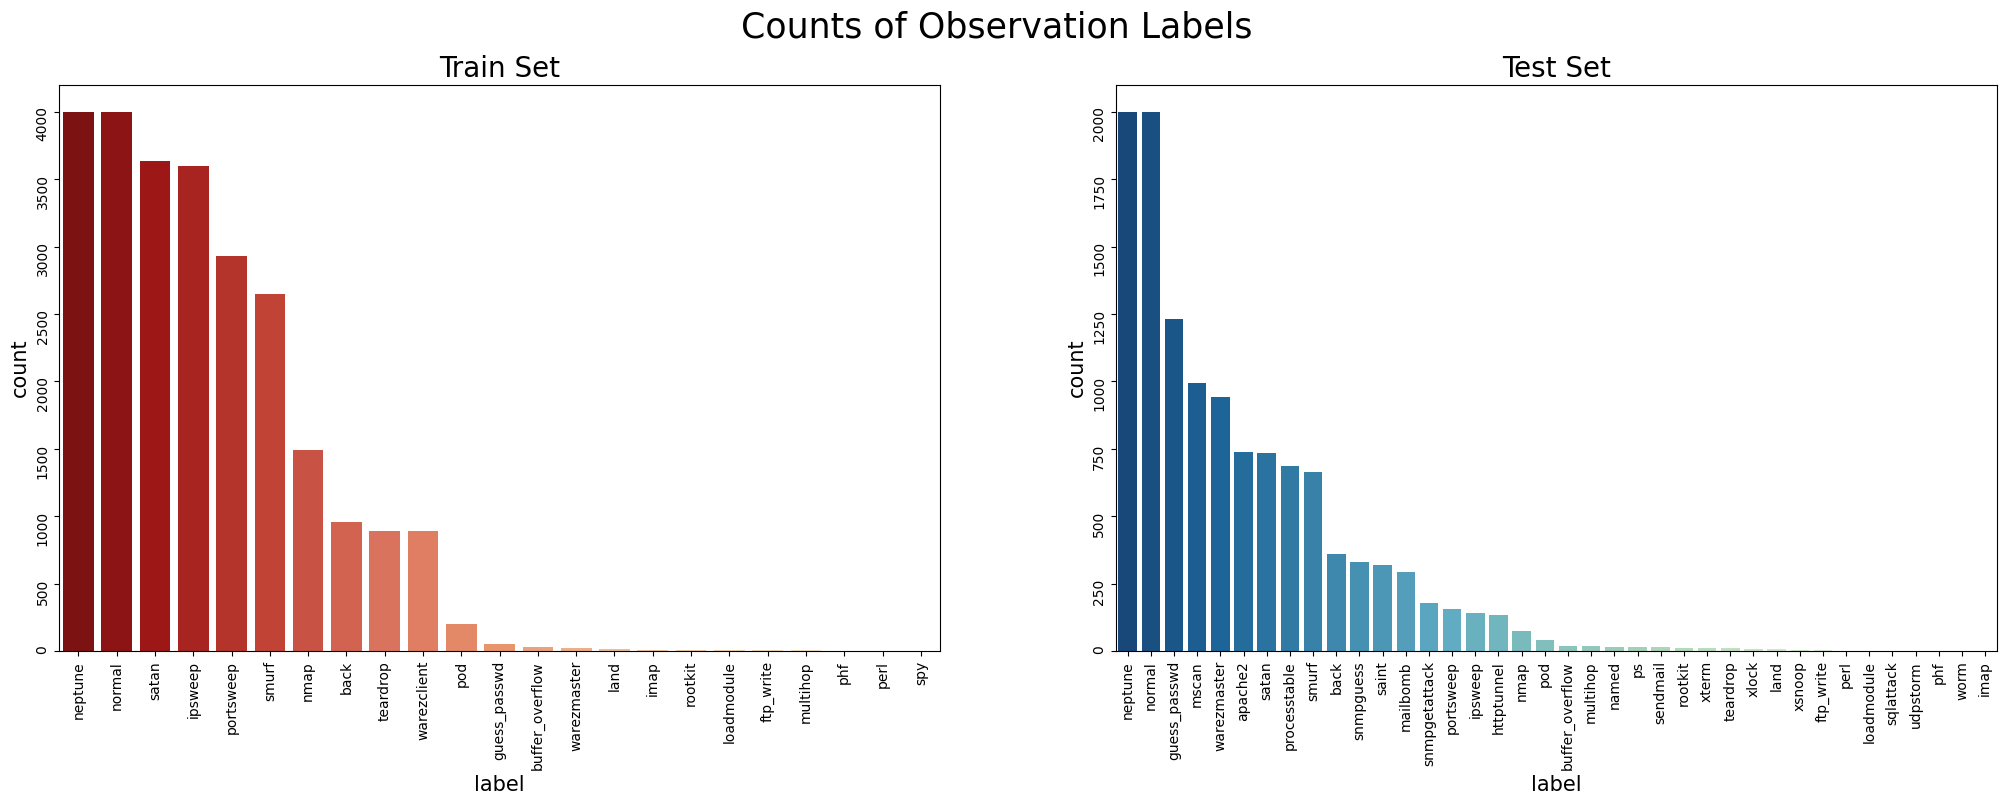

In [95]:
visualize(df_train_copy,df_test_copy)

Let's only keep the first 10 attack types from the training set and move everything else to a new category called 'other'. Let' do that on both sets.

In [96]:
keep_attacks = ['neptune', 'normal', 'satan', 'ipsweep', 'portsweep', 'smurf', 'nmap', 'back', 'teardrop']
df_train_copy['attack'] = df_train_copy['attack'].apply(lambda x: x if x in keep_attacks else 'other')
df_test_copy['attack'] = df_test_copy['attack'].apply(lambda x: x if x in keep_attacks else 'other')

Let's visualize again

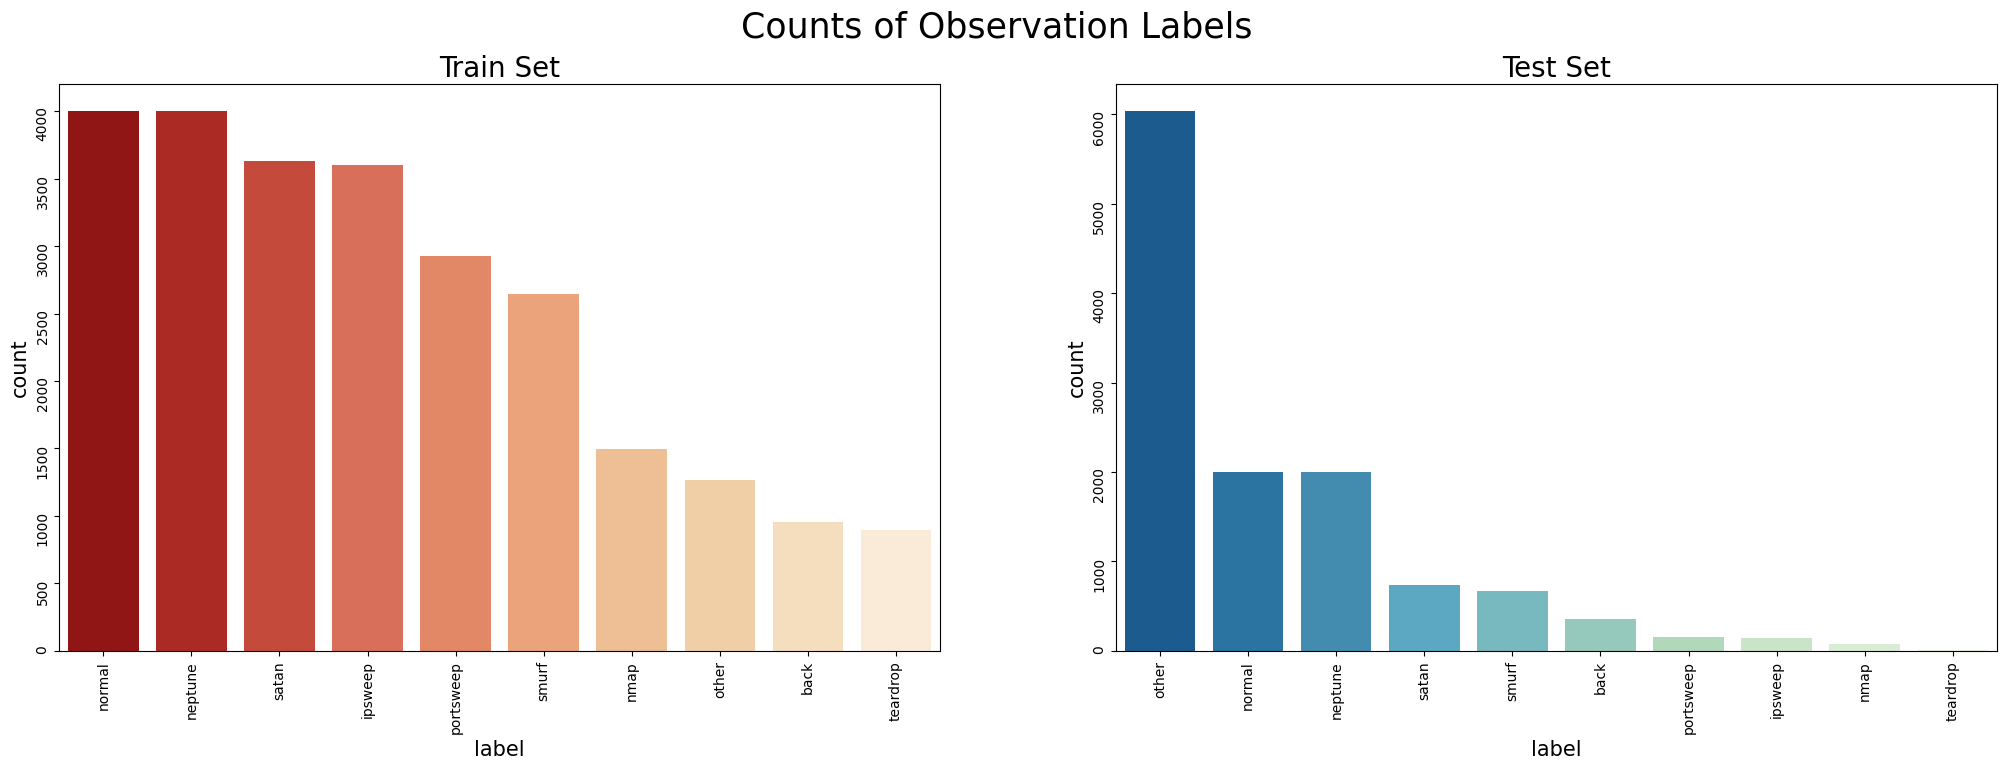

In [97]:
visualize(df_train_copy,df_test_copy)

Now, we have too much data in the 'other' category on the training side. Let's steal some of the other data from the test side and put them on the training side

In [98]:


seed_random = 718
test_split_size=0.35

df_test_other_slice = df_test_copy[df_test_copy['attack']=='other'].copy()

df_train_other_sample, df_test_other_sample = train_test_split(df_test_other_slice, test_size=test_split_size, random_state=seed_random)

df_test_copy.drop(df_test_copy.loc[df_test_copy['attack']=='other'].index, inplace=True)

df_train_copy = pd.concat([df_train_copy, df_train_other_sample], axis=0)
df_test_copy = pd.concat([df_test_copy, df_test_other_sample], axis=0)

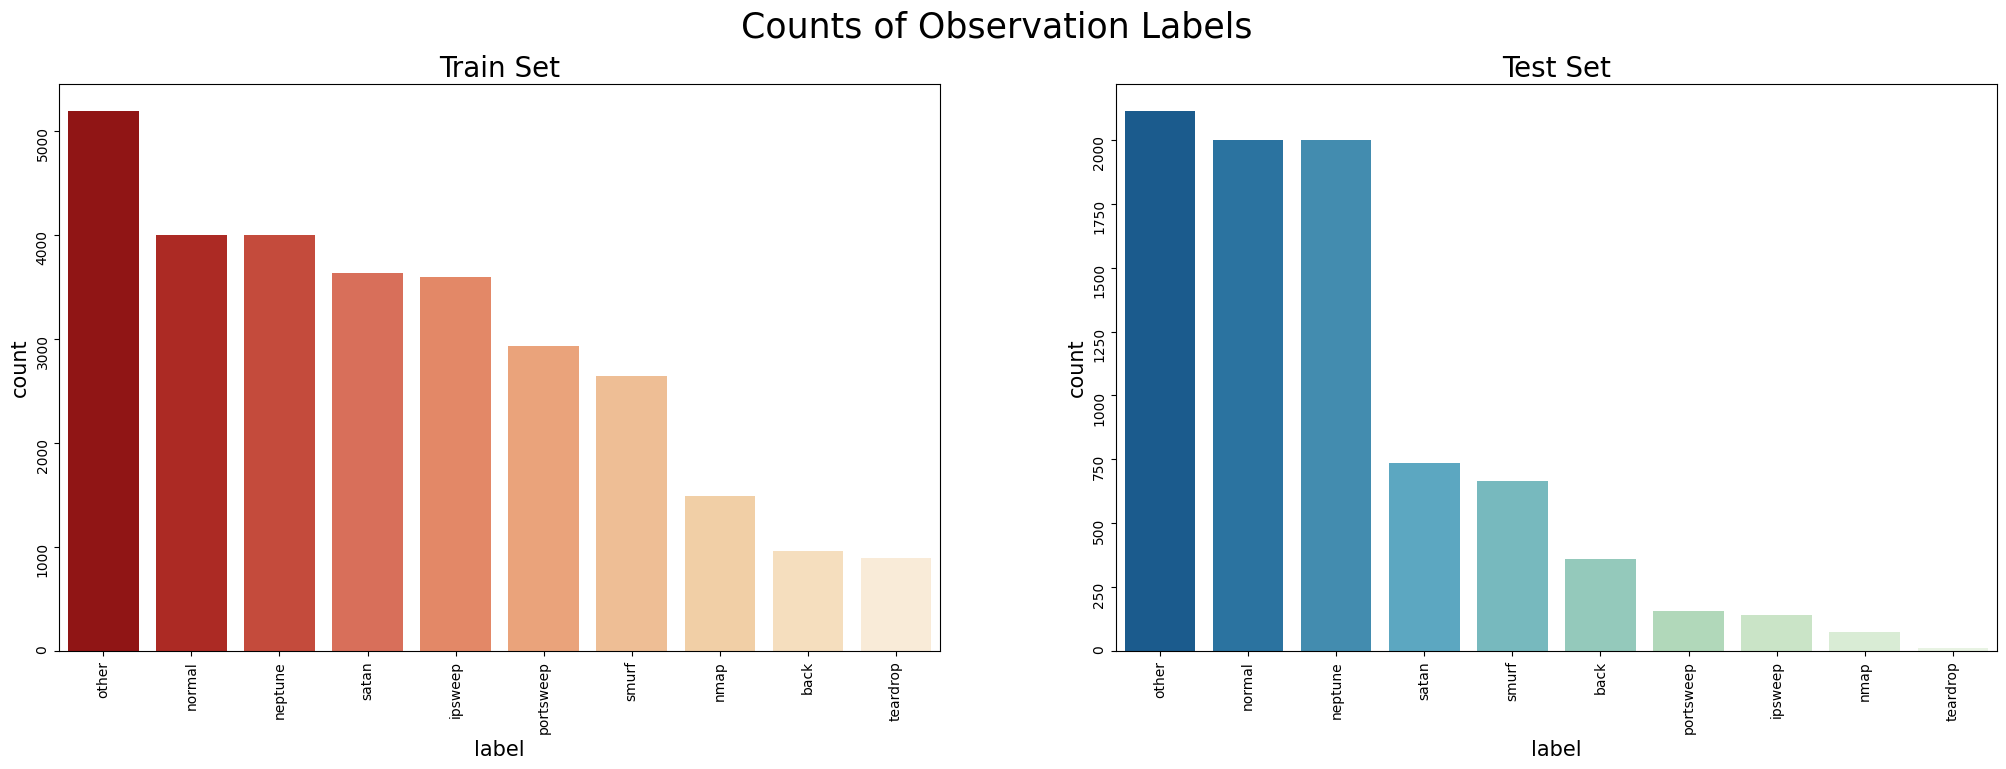

In [99]:
visualize(df_train_copy,df_test_copy)

Let's now look at the distribution of integer attributes that has more than 10 distinct values.

In [100]:
def plot_hist(df, cols, title):
    grid = gridspec.GridSpec(10, 2, wspace=0.5, hspace=0.5) 
    fig = plt.figure(figsize=(15,25)) 
    
    for n, col in enumerate(df[cols]):         
        ax = plt.subplot(grid[n]) 

        ax.hist(df[col], bins=20) 
        #ax.set_ylabel('Count', fontsize=12)
        ax.set_title(f'{col} distribution', fontsize=15) 
    
    fig.suptitle(title, fontsize=20)
    grid.tight_layout(fig, rect=[0, 0, 1, 0.97])
    plt.show()

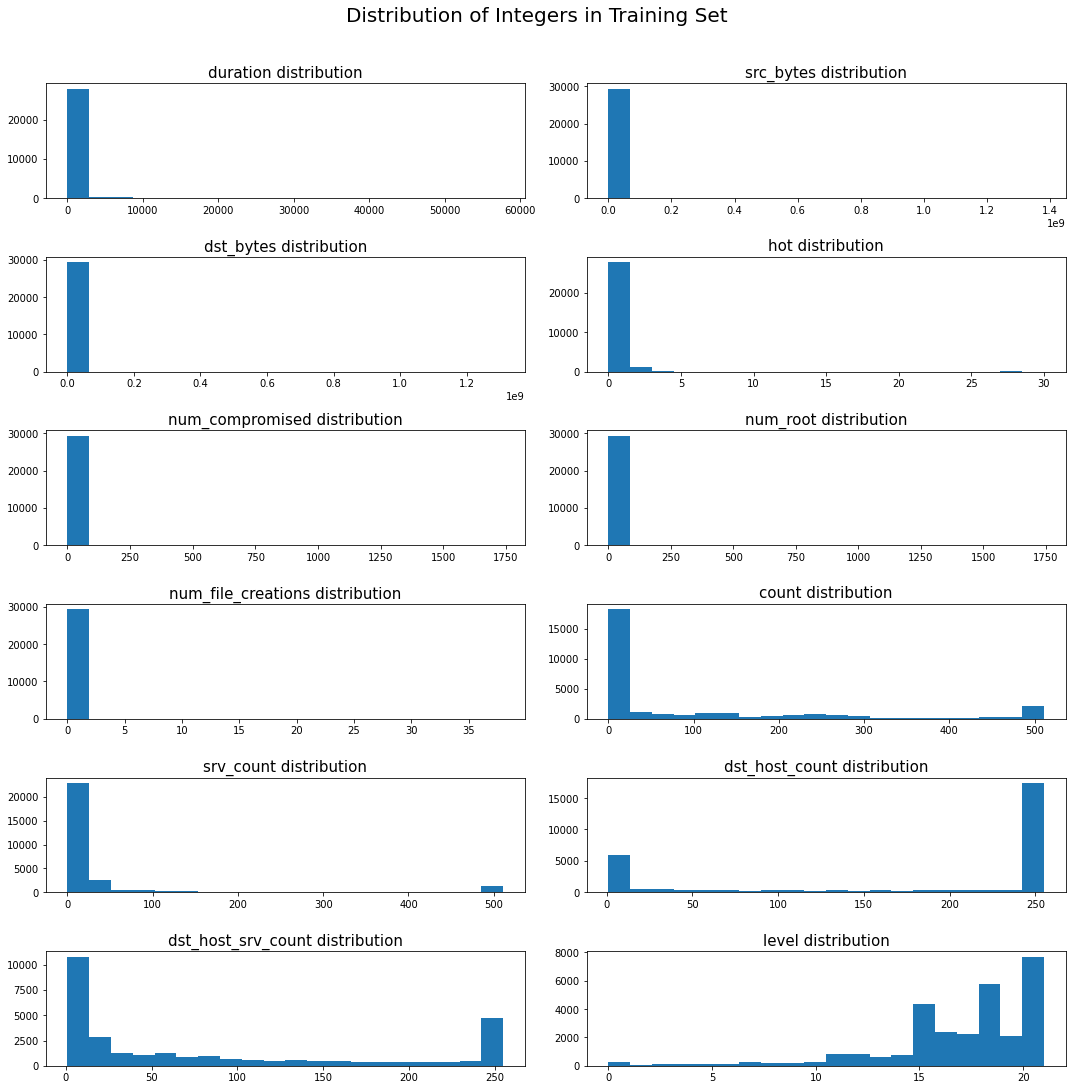

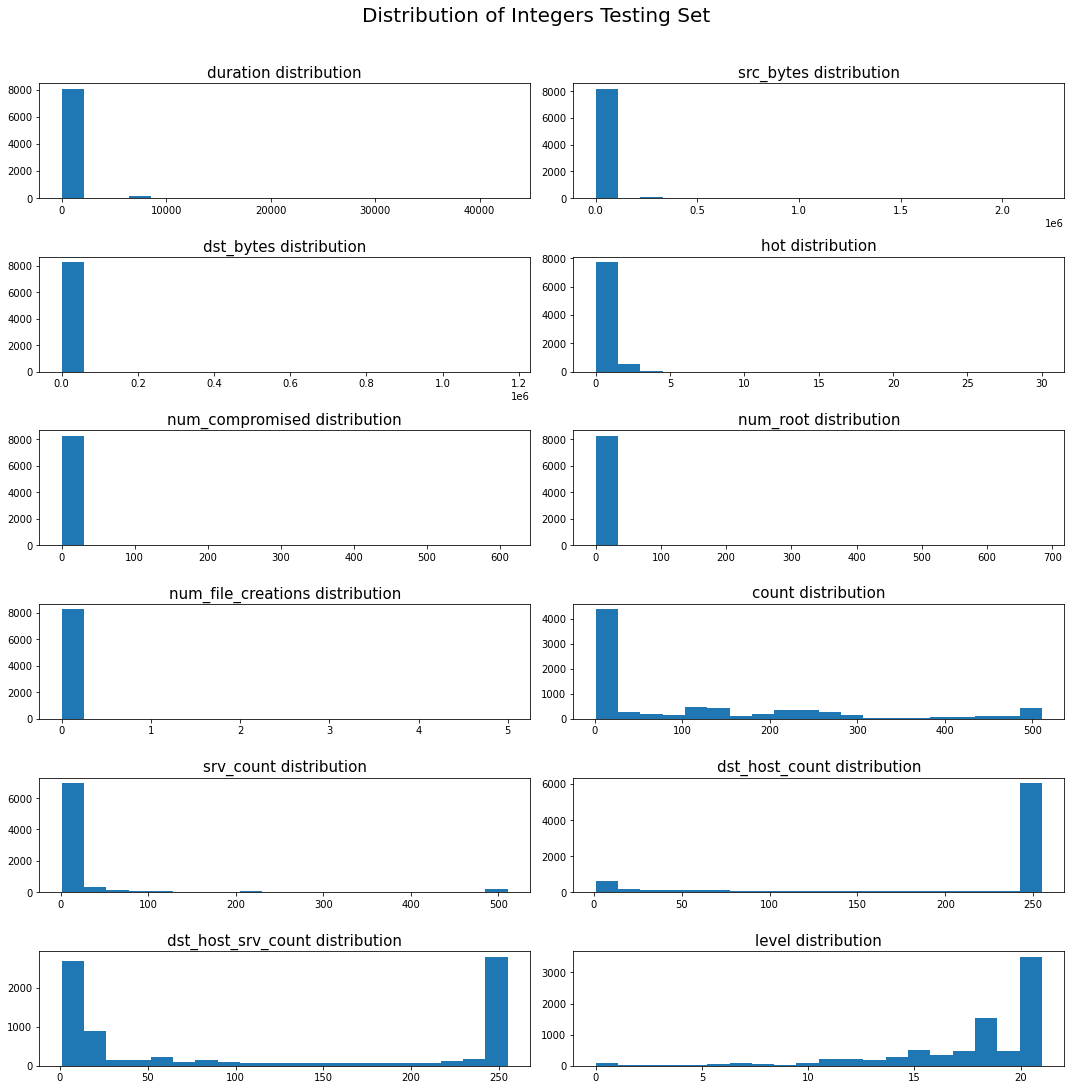

In [101]:
integer_cols = [ 'duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'num_file_creations', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count','level']

    
plot_hist(df_train_copy, integer_cols, 'Distribution of Integers in Training Set')
plot_hist(df_test_copy, integer_cols, 'Distribution of Integers Testing Set')

Let's covert them to thier log values for a smoother distribution set

In [102]:
for col in integer_cols:
    df_train_copy[col] = np.log(df_train_copy[col]+1e-6)
    df_test_copy[col] = np.log(df_test_copy[col]+1e-6)



Let's plot them again

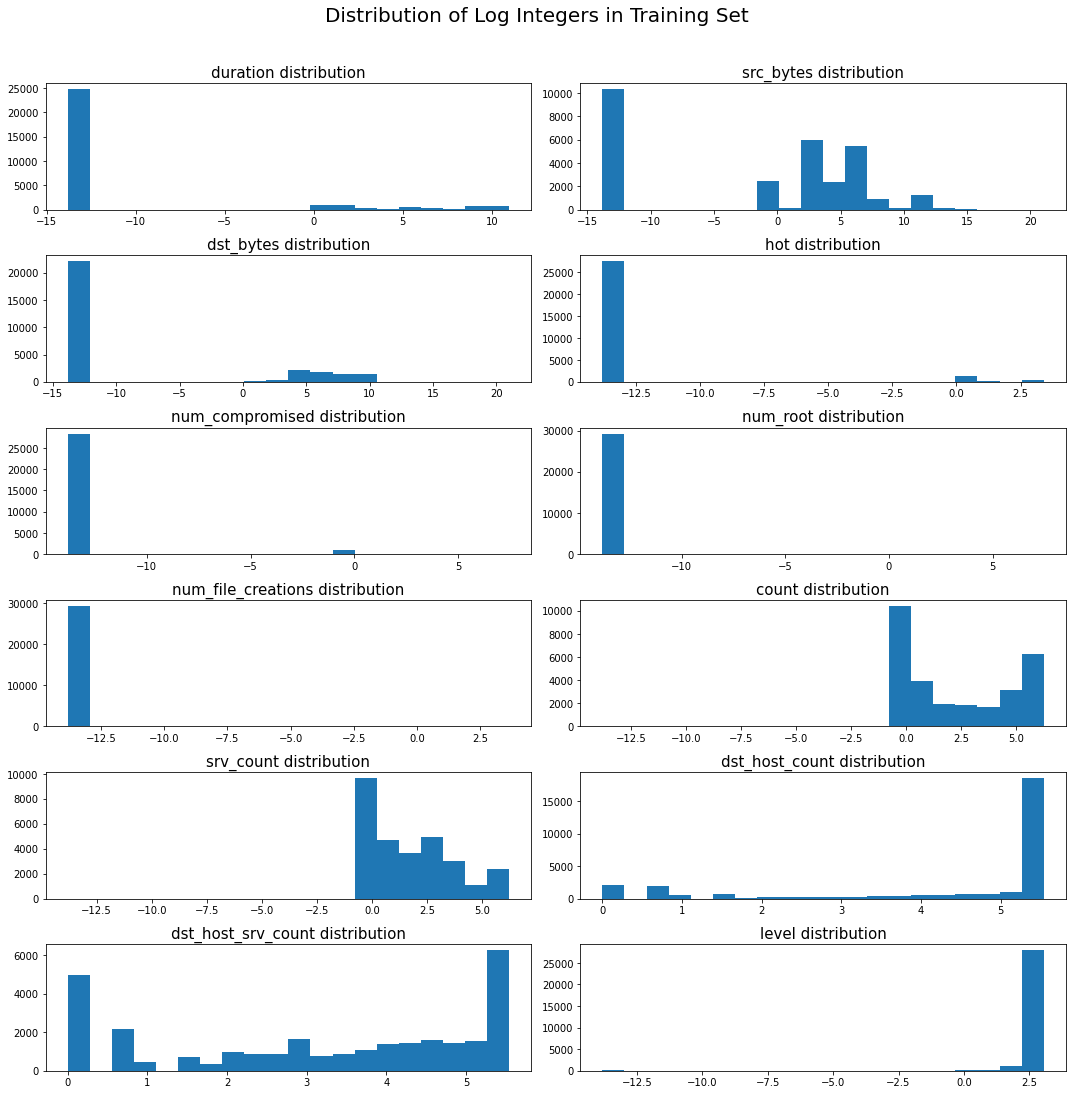

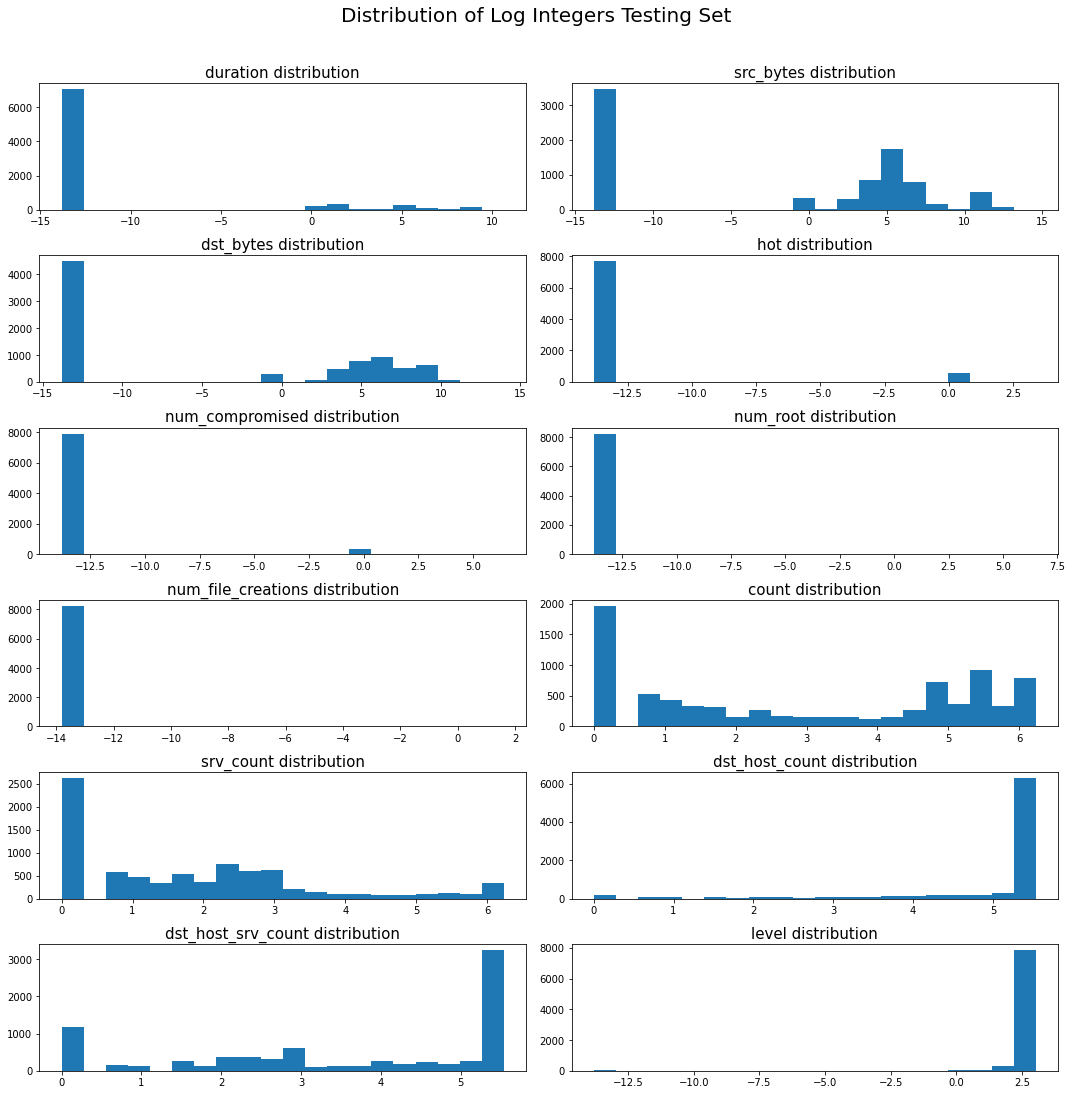

In [103]:
plot_hist(df_train_copy, integer_cols, 'Distribution of Log Integers in Training Set')
plot_hist(df_test_copy, integer_cols, 'Distribution of Log Integers Testing Set')

The look better now.

Let's now change the 'protocol_type', 'service' and 'flag' attributes to numerical values

In [104]:
df_train_copy['train']=1                                                                       
df_test_copy['train']=0                                                                        

joined_df = pd.concat([df_train_copy, df_test_copy])                                           
 
protocol_dummies = pd.get_dummies(joined_df['protocol_type'], prefix='protocol_type')          
service_dummies = pd.get_dummies(joined_df['service'], prefix='service')                       
flag_dummies = pd.get_dummies(joined_df['flag'], prefix='flag')                                

joined_df = pd.concat([joined_df, protocol_dummies, service_dummies, flag_dummies], axis=1)    

df_train_copy = joined_df[joined_df['train']==1]                                               
df_test_copy = joined_df[joined_df['train']==0]                                                

drop_cols = ['train', 'protocol_type', 'service', 'flag']                                      

df_train_copy.drop(drop_cols, axis=1, inplace=True)                                            
df_test_copy.drop(drop_cols, axis=1, inplace=True)                                             


In [105]:
df_train_copy.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,...,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
13,-13.815511,5.811141,-13.815511,0,0,0,-13.815511,0,1,-13.815511,0,0,-13.815511,-13.815511,0,0,0,0,0,6.931477e-01,6.931477e-01,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
17,-13.815511,2.890372,-13.815511,0,0,0,-13.815511,0,0,-13.815511,0,0,-13.815511,-13.815511,0,0,0,0,0,9.999995e-07,9.999995e-07,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
30,-13.815511,2.079442,-13.815511,0,0,0,-13.815511,0,0,-13.815511,0,0,-13.815511,-13.815511,0,0,0,0,0,9.999995e-07,2.484907e+00,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
33,-13.815511,-13.815511,-13.815511,0,0,0,-13.815511,0,0,-13.815511,0,0,-13.815511,-13.815511,0,0,0,0,0,6.931477e-01,9.999995e-07,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
46,-13.815511,3.332205,-13.815511,0,3,0,-13.815511,0,0,-13.815511,0,0,-13.815511,-13.815511,0,0,0,0,0,4.382027e+00,4.382027e+00,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [106]:
df_test_copy.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,...,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
28,-13.815511,6.253829,-13.815511,0,0,0,-13.815511,0,0,-1.381551e+01,0,0,-13.815511,-13.815511,0,0,0,0,0,6.236370e+00,6.236370e+00,0.00,0.0,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
34,-13.815511,-13.815511,-13.815511,0,0,0,-13.815511,0,0,-1.381551e+01,0,0,-13.815511,-13.815511,0,0,0,0,0,6.180017e+00,9.999995e-07,0.05,0.0,0.92,1.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
47,-13.815511,10.906690,9.025696,0,0,0,0.693148,0,1,9.999995e-07,0,0,-13.815511,-13.815511,0,0,0,0,0,1.386295e+00,3.178054e+00,0.00,0.0,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
64,-13.815511,-13.815511,-13.815511,0,0,0,-13.815511,0,0,-1.381551e+01,0,0,-13.815511,-13.815511,0,0,0,0,0,6.021023e+00,9.999995e-07,0.15,0.0,0.83,1.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
98,-13.815511,-13.815511,-13.815511,0,0,0,-13.815511,0,0,-1.381551e+01,0,0,-13.815511,-13.815511,0,0,0,0,0,9.999995e-07,9.999995e-07,1.00,1.0,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Let's separate the features from the label

In [107]:
y_buffer = df_train_copy['attack'].copy()
x_buffer = df_train_copy.drop(['attack'], axis=1)

y_test = df_test_copy['attack'].copy()
x_test = df_test_copy.drop(['attack'], axis=1)

Time to separate training data from validation data

In [108]:
seed_random = 315

x_train, x_val, y_train, y_val = train_test_split(x_buffer, y_buffer, test_size=0.3, random_state=seed_random)

Let's build the model creation function

In [109]:
def create_model(input_size,output_size,my_learning_rate):
  """Create and compile a deep neural net."""
  
  # All models in this course are sequential.
  deep_model = Sequential()

  #input layer
  deep_model.add(Dense(256, input_dim=input_size, activation='softplus'))


  # 3 hidden layer
  deep_model.add(Dense(128, activation='relu', name='Hidden1'))
  # Define a dropout regularization layer. 
  #model.add(tf.keras.layers.Dropout(rate=0.2))

  deep_model.add(Dense(64, activation='relu',name='Hidden2'))
  # Define a dropout regularization layer. 
  #model.add(tf.keras.layers.Dropout(rate=0.2))

  deep_model.add(Dense(32, activation='relu',name='Hidden3'))
  # Define a dropout regularization layer. 
  #model.add(tf.keras.layers.Dropout(rate=0.2))

  # output layer
  deep_model.add(Dense(output_size, activation='softmax'))

                          
  # Construct the layers into a model that TensorFlow can execute.  
  # Notice that the loss function for multi-class classification
  # is different than the loss function for binary classification.  
  
  deep_model.compile(loss='categorical_crossentropy', 
                   optimizer=Adam(learning_rate=my_learning_rate, beta_1=0.9, beta_2=0.999, amsgrad=True),
                   metrics=['accuracy'])
  
  return deep_model 

Let's create the model with all the features as input, all the attack categories as output and at a learning rate of 0.001 and train it.


In [110]:
def train_model(deep_model, train_features, train_label, epochs, 
                batch_size, validation_features, validation_label):
  """Train the model by feeding it data."""

  history = deep_model.fit(train_features, train_label, 
               epochs=epochs, 
               batch_size=batch_size,
               validation_data=(validation_features, validation_label))
  # To track the progression of training, gather a snapshot
  # of the model's metrics at each epoch. 
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist  


Time to encode the label column

In [111]:
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y_buffer)

y_train_econded = label_encoder.transform(y_train)
y_val_econded = label_encoder.transform(y_val)
y_test_econded = label_encoder.transform(y_test)

y_train_dummy = np_utils.to_categorical(y_train_econded)
y_val_dummy = np_utils.to_categorical(y_val_econded)
y_test_dummy = np_utils.to_categorical(y_test_econded)

In [112]:
my_learning_rate=0.001
my_epochs = 50
my_batch_size = 2500

deep_model = create_model(len(x_train.columns),y_train.nunique(), my_learning_rate)
epochs, hist = train_model(deep_model=deep_model,train_features=x_train, 
                           train_label=y_train_dummy,epochs=my_epochs, 
                           batch_size = my_batch_size,
                           validation_features=x_val, validation_label=y_val_dummy)



Epoch 1/50
9/9 [==============================] - 1s 83ms/step - loss: 2.1860 - accuracy: 0.2616 - val_loss: 1.7062 - val_accuracy: 0.5307
Epoch 2/50
9/9 [==============================] - 0s 56ms/step - loss: 1.4830 - accuracy: 0.6266 - val_loss: 1.2279 - val_accuracy: 0.6559
Epoch 3/50
9/9 [==============================] - 0s 55ms/step - loss: 1.0719 - accuracy: 0.7473 - val_loss: 0.9402 - val_accuracy: 0.7620
Epoch 4/50
9/9 [==============================] - 0s 56ms/step - loss: 0.8321 - accuracy: 0.7786 - val_loss: 0.7538 - val_accuracy: 0.7830
Epoch 5/50
9/9 [==============================] - 0s 56ms/step - loss: 0.6811 - accuracy: 0.7976 - val_loss: 0.6358 - val_accuracy: 0.8112
Epoch 6/50
9/9 [==============================] - 0s 56ms/step - loss: 0.5733 - accuracy: 0.8294 - val_loss: 0.5464 - val_accuracy: 0.8309
Epoch 7/50
9/9 [==============================] - 0s 46ms/step - loss: 0.4904 - accuracy: 0.8502 - val_loss: 0.4672 - val_accuracy: 0.8472
Epoch 8/50
9/9 [===========

In [113]:
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


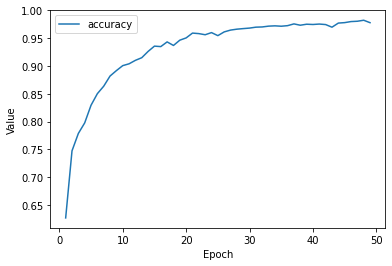

In [114]:
# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

In [115]:
predictions = deep_model.predict(x_val)
deep_val_pred = np.argmax(predictions, axis=-1)
deep_val_pred_decoded = label_encoder.inverse_transform(deep_val_pred)

test_predictions = deep_model.predict(x_test)
deep_test_pred = np.argmax(test_predictions, axis=-1)
deep_test_pred_decoded = label_encoder.inverse_transform(deep_test_pred)

258/258 [==============================] - 1s 2ms/step


In [116]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, mean_absolute_error, make_scorer 

def plot_cm(y_true, y_pred, title):
    figsize=(14,14)
    #y_pred = y_pred.astype(int)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

In [124]:
val_loss, val_accuracy=deep_model.evaluate(x=x_val, y=y_val_dummy, batch_size=my_batch_size)
print("Validation Accuracy :", round(val_accuracy*100,2))
print("Validation Loss :", val_loss)


4/4 [==============================] - 0s 17ms/step - loss: 0.0839 - accuracy: 0.9805
Validation Accuracy : 98.05
Validation Loss : 0.08387906104326248


0.9812470355301495

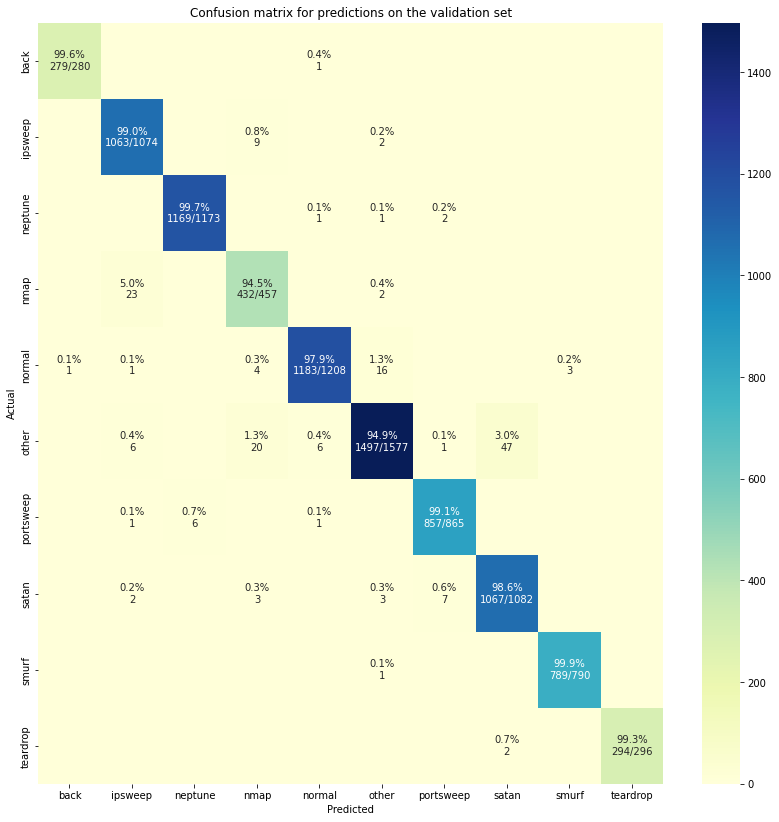

In [118]:
plot_cm(y_val, deep_val_pred_decoded, 'Confusion matrix for predictions on the validation set')
f1_score(y_val, deep_val_pred_decoded, average = 'macro')

In [123]:
test_loss, test_accuracy=deep_model.evaluate(x=x_test, y=y_test_dummy, batch_size=my_batch_size)
print("Test Accuracy :", round(test_accuracy*100,2))
print("Test Loss :", test_loss)


4/4 [==============================] - 0s 16ms/step - loss: 0.2133 - accuracy: 0.9664
Test Accuracy : 96.64
Test Loss : 0.21333879232406616


0.9172884813815114

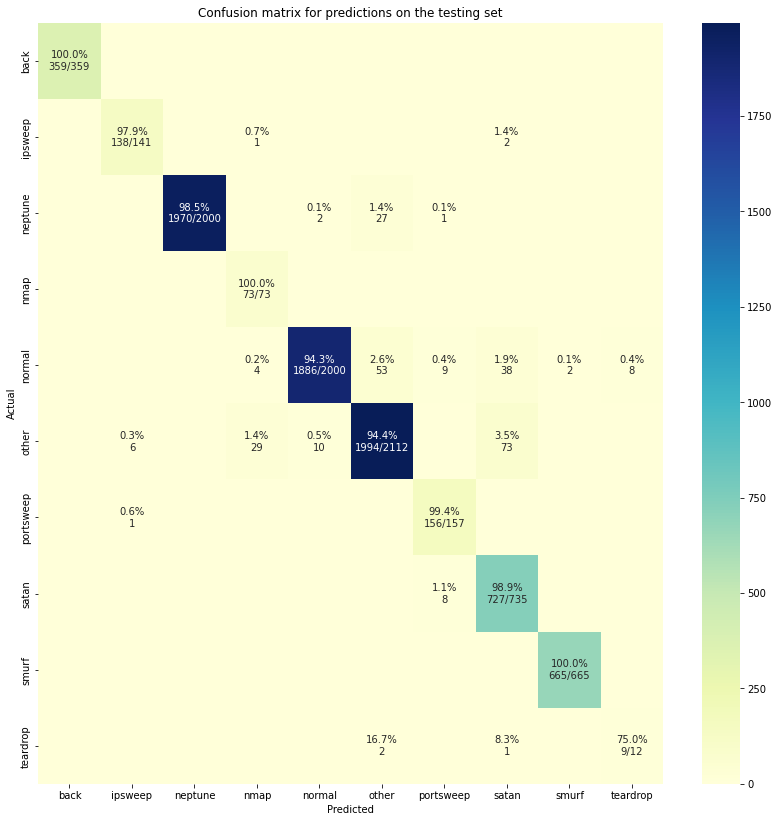

In [119]:
plot_cm(y_test, deep_test_pred_decoded, 'Confusion matrix for predictions on the testing set')
f1_score(y_test, deep_test_pred_decoded, average = 'macro')